In [1]:
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import seaborn as sns
import cv2
from tf_explain.core.grad_cam import GradCAM
from sklearn.svm import SVC


In [2]:


image_size = (224,224)

In [3]:
import pathlib
def getData(labels,urls,dic_label):
    
    ds = []
    for label in labels :
      url = f"{urls}{label}"
      for filename in os.listdir(url):
        img = cv2.imread(os.path.join(url,filename))
        img = cv2.resize(img,image_size)
        img = img.astype(np.float32)
        img /= 255.0
        img = np.asarray(img)
        ds.append([img,label])
  
    data =   np.asarray(ds)
    x = np.asarray(data[:,0])
    x=np.array([np.array(val) for val in x])
    y = [dic_label[zi] for zi in data[:,1]]
    return x,y 

In [4]:
def plt_result(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(15,5))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [5]:
def plt_analytic(history):
   plt.plot(history.history['accuracy'])
   plt.plot(history.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   # summarize history for loss
   plt.plot(history.history['loss'])
   plt.plot(history.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()

In [6]:
def gradcam_visualise(data, model, class_index):
    explainer = GradCAM()
    output = explainer.explain(data, model, class_index=class_index)
    return output

In [7]:
def grad_cam(model,image_path,class_index):
    output_data = []
    img = cv2.imread(image_path)
    img = cv2.resize(img,image_size)
  
    data = ([img], None)
    output = gradcam_visualise(data, model, class_index)
    plt.figure(figsize=(5, 5))
    plt.imshow(output)

In [45]:
def get_predict_label(pred):
  dic = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
  firstLabel = np.argmax(pred)
  newPred  = np.delete(pred, firstLabel)
  secondValue = np.amax(newPred)
  print(secondValue)
  secondLabel = np.where(pred[0] == secondValue)
  print(secondLabel)
  print(pred[0])
  return dic[firstLabel],dic[secondLabel[0][0]]

593.2708
(array([0], dtype=int64),)
[ 593.2708   936.2489   487.7651   141.61945 -248.69855]
predict confidence
1 :  dog
2 :  chicken


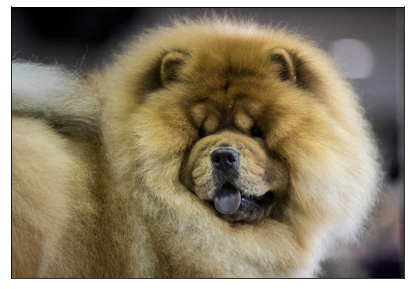

In [52]:
path = "t.jpg"
makePredict(path,model,(224,224))

In [9]:
def makePredict(path,model,size_image):
    img = image.load_img(path, target_size=size_image)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    label = get_predict_label(preds)
    print("predict confidence")
    print('1 : ' , label[0])
    print('2 : ' , label[1])
    plt_result(path)

In [10]:
dic = {"chicken" : 0,"dog" : 1, "elephant" : 2,"cat" : 3 , "cow" : 4}
labels = ['chicken','dog','elephant','cat','cow']
url = f"F:/Nam3HK2/KHDL/final/dataset/khdl_dummy_data/"
url_val = f"F:/Nam3HK2/KHDL/final/dataset/validation_data/"
X_train,y_train = getData(labels,url,dic)
X_test,y_test=getData(labels,url_val,dic)
print(X_train.shape)
print(X_test.shape)
# lenofimage = len(X_test)
# X_test= np.array(X_test).reshape(lenofimage,-1)
# y2 = svc.predict(X_test)

C:\Users\phong\AppData\Local\Temp\ipykernel_8092\1909768187.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data =   np.asarray(ds)


(1020, 224, 224, 3)
(240, 224, 224, 3)


In [11]:
def gradcam_visualise(data, model, class_index):
    explainer = GradCAM()
    output = explainer.explain(data, model, class_index=class_index)
    return output

In [12]:
def plot_data_four(class_name, outputs):
    fig = plt.figure(figsize=(16, 16))
    plt.suptitle(class_name)
    plt.subplot(2,2,1)
    plt.imshow(outputs[0])
    plt.subplot(2,2,2)
    plt.imshow(outputs[1])
    plt.subplot(2,2,3)
    plt.imshow(outputs[2])
    plt.subplot(2,2,4)
    plt.imshow(outputs[3])
    plt.show()

In [13]:
def grad_cam(model,image_path,class_index):
    output_data = []
    img = cv2.imread(image_path)
    img = cv2.resize(img,image_size)
  
    data = ([img], None)
    output = gradcam_visualise(data, model, class_index)
    plt.figure(figsize=(5, 5))
    plt.imshow(output)

In [14]:
def plot_confusion_matrix(y_pred_labels,y_true_labels,dicLabel):
    labels = list(dicLabel.keys())
    textLabel = list(dicLabel.values())
    conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)
    df_cm = pd.DataFrame(conf_mat, index = textLabel,
                         columns = textLabel)
    plt.figure(figsize = (10,8))
    plt.title('Confusion Matrix')
    sns.heatmap(df_cm, annot=True, cmap='viridis')
    plt.show()

In [15]:
x_train_svc = np.array(X_train).reshape(len(X_train),-1)
y_train_svc = y_train 
x_test_svc = np.array(X_test).reshape(len(X_test),-1)
y_test_svc = y_test

x_train_svc  = x_train_svc/255.0
x_test_svc = x_test_svc/255.0
svc = SVC()

svc.fit(x_train_svc, y_train_svc)


SVC()

In [16]:

svc_pred = svc.predict(x_test_svc)


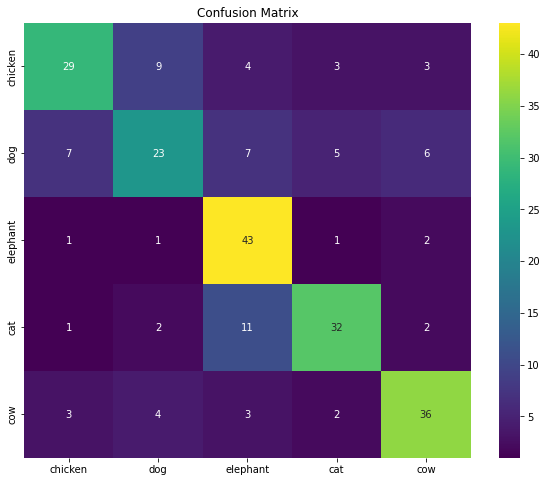

In [17]:
dicLabel = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
plot_confusion_matrix(svc_pred,y_test_svc,dicLabel)

# dicLabel = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
# img = cv2.imread("t.jpg")
# img = cv2.resize(img,(150,150))
# data = img /255.0

# lenofimage = len(data)
# print(data.shape)
# data= np.array(data).reshape(lenofimage,-1)
# data= np.array(data).reshape(1,-1)
# print(data.shape)
# print(len(data))
# y2 = svc.predict(data)
# # print(y2)
# dicLabel[y2[0]]

In [54]:
dicLabel = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
img = cv2.imread("t.jpg")
img = cv2.resize(img,(224,224))
data = img /255.0

lenofimage = len(data)
print(data.shape)
data= np.array(data).reshape(lenofimage,-1)
data= np.array(data).reshape(1,-1)
print(data.shape)
print(len(data))
y2 = svc.predict(data)
# print(y2)
dicLabel[y2[0]]

(224, 224, 3)
(1, 150528)
1


'cat'

In [18]:
# model = models.Sequential()
# model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu', input_shape=(244, 244, 3)))
# model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
# model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dense(4096, activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.Dense(5))

In [19]:

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))          
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5))

# chuan

In [20]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(5))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
x_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=12 )

Epoch 1/12
32/32 [==============================] - 12s 201ms/step - loss: 1.7688 - accuracy: 0.2265 - val_loss: 1.6005 - val_accuracy: 0.2000
Epoch 2/12
32/32 [==============================] - 5s 161ms/step - loss: 1.4651 - accuracy: 0.3451 - val_loss: 1.6583 - val_accuracy: 0.3875
Epoch 3/12
32/32 [==============================] - 5s 162ms/step - loss: 1.4139 - accuracy: 0.4020 - val_loss: 1.4249 - val_accuracy: 0.4458
Epoch 4/12
32/32 [==============================] - 5s 161ms/step - loss: 1.2969 - accuracy: 0.4696 - val_loss: 1.4873 - val_accuracy: 0.4083
Epoch 5/12
32/32 [==============================] - 5s 161ms/step - loss: 1.0853 - accuracy: 0.5627 - val_loss: 1.1323 - val_accuracy: 0.5750
Epoch 6/12
32/32 [==============================] - 5s 162ms/step - loss: 0.8948 - accuracy: 0.6686 - val_loss: 1.2641 - val_accuracy: 0.5333
Epoch 7/12
32/32 [==============================] - 5s 162ms/step - loss: 0.7503 - accuracy: 0.7059 - val_loss: 1.0015 - val_accuracy: 0.7000
Epoch

In [23]:
# layer_outputs = [layer.output for layer in model.layers[:8]]
# from tensorflow.keras.preprocessing import image
# path = "choDo.png"
# img = image.load_img(path, target_size=(150, 150))
# activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# activations = activation_model.predict(x)
# first_layer_activation = activations[3]
# plt.matshow(first_layer_activation[0, :, :, 5], cmap ='viridis')

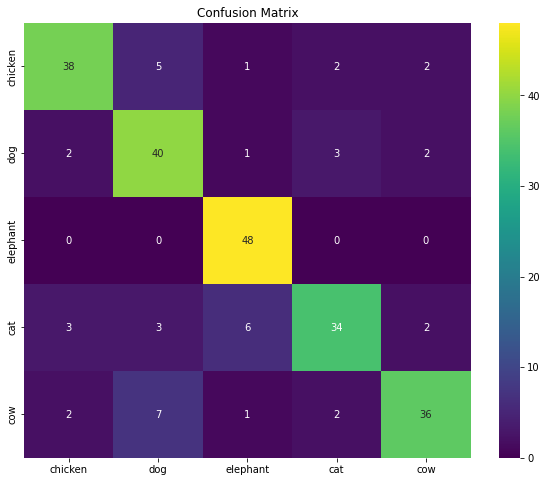

In [24]:
dicLabel = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
y_predict=model.predict(x_test)

y_pred_labels =np.argmax(y_predict,axis=1)
y_true_labels = y_test
plot_confusion_matrix(y_pred_labels,y_true_labels,dicLabel)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


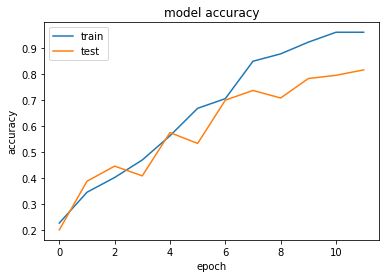

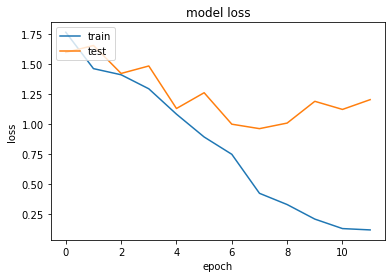

In [25]:
print(history.history.keys())
plt_analytic(history)

predict confidence
1 :  chicken
2 :  chicken


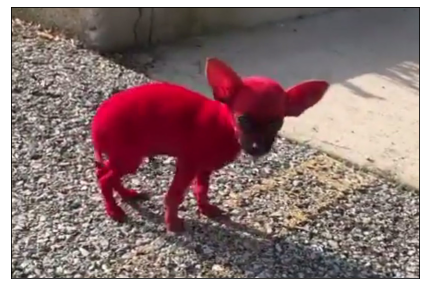

In [31]:
from tensorflow.keras.preprocessing import image




path = "choDo.png"
makePredict(path,model,(224,224))

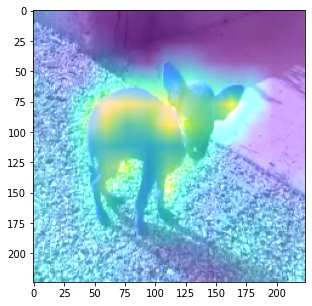

In [27]:

grad_cam(model,"choDo.png",1)